In [24]:
import requests
import re
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# URL of the MATLAB script
url = 'https://raw.githubusercontent.com/rtol/NobelNetwork/master/NobelTree.m'

In [3]:
# Fetch the content from the URL
response = requests.get(url)

In [54]:
script = response.text[:2000]

In [55]:
# Define a function to extract pairs from the script
def extract_pairs(script):
    student_professor_pairs = []
    student_pattern = re.compile(r"s\d+\s*=\s*\{(.*?)\};", re.DOTALL)
    professor_pattern = re.compile(r"p\d+\s*=\s*\{(.*?)\};", re.DOTALL)
    
    student_matches = student_pattern.findall(script)
    professor_matches = professor_pattern.findall(script)
    
    for s_match, p_match in zip(student_matches, professor_matches):
        students = re.findall(r"'([^']*)'", s_match)
        professors = re.findall(r"'([^']*)'", p_match)
        student_professor_pairs.append((students, professors))
    
    return student_professor_pairs

In [56]:
# Extract pairs from the script loaded from the URL
student_professor_pairs = extract_pairs(script)

In [57]:
# Create a directed graph from the extracted pairs
G_complete = nx.DiGraph()

In [58]:
# Add edges to the graph
for students, professors in student_professor_pairs:
    for student, professor in zip(students, professors):
        G_complete.add_edge(professor, student)

In [59]:
G_complete.number_of_nodes()

32

In [60]:
G_complete.number_of_edges()

36

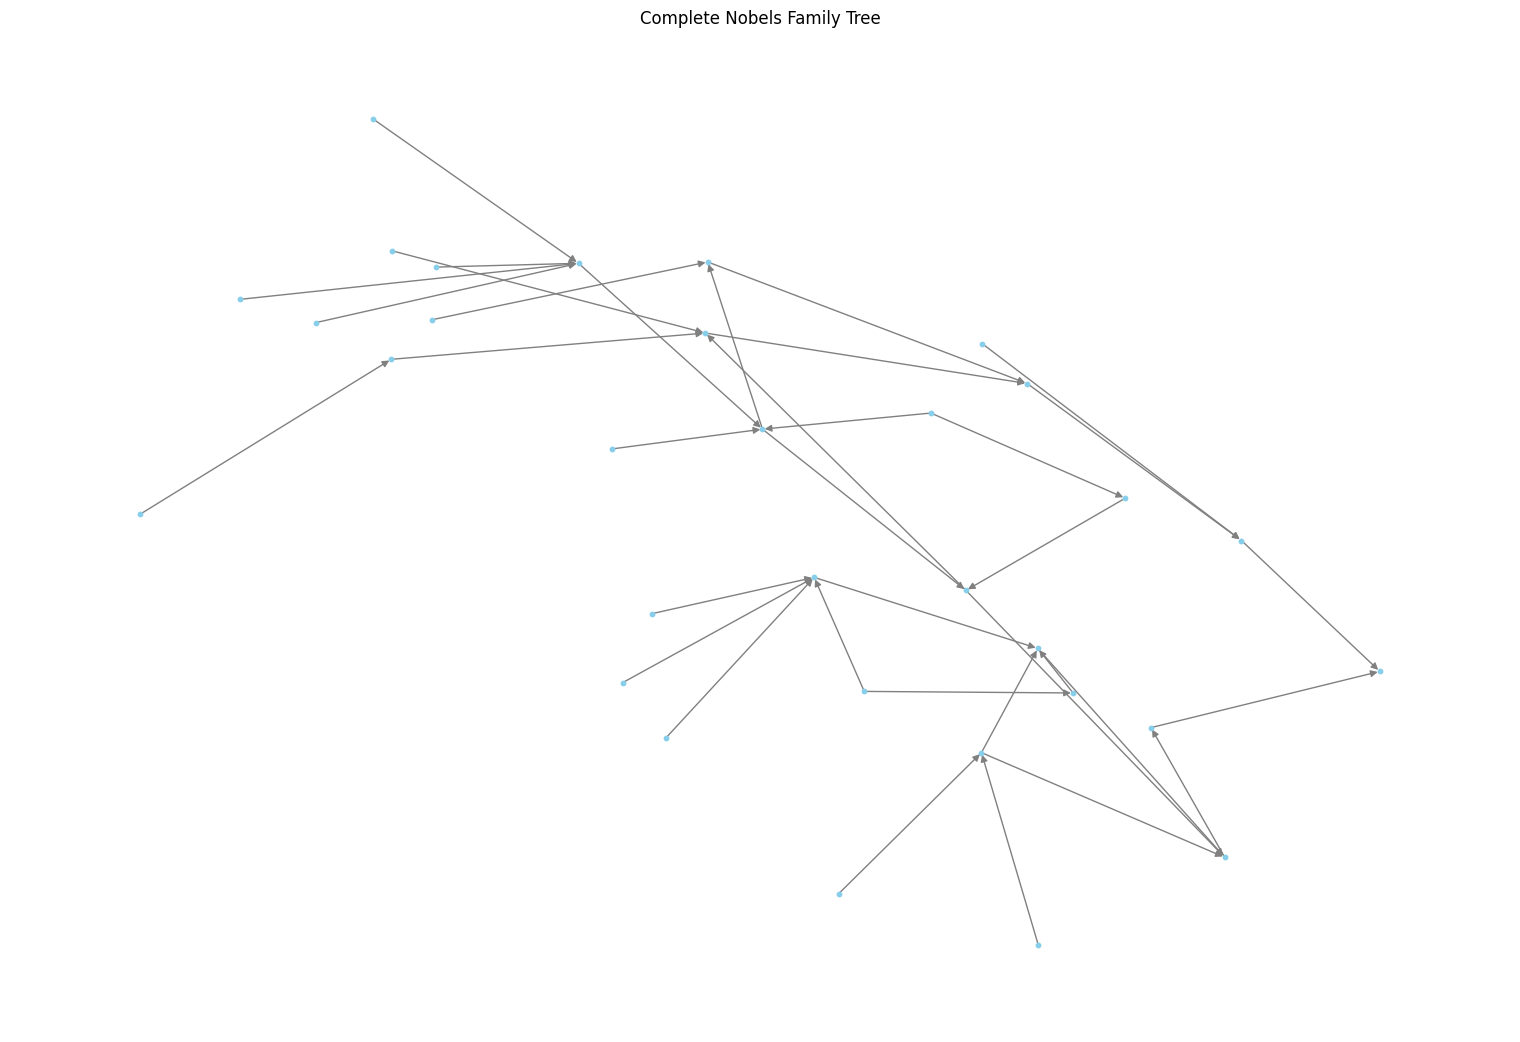

In [72]:
# Plot the complete graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_complete, k=0.3, iterations=50)
nx.draw(G_complete, pos, with_labels=False, node_size=10, node_color="skyblue", font_size=10, font_weight="bold", edge_color='gray')
plt.title('Complete Nobels Family Tree')
plt.show() 

In [38]:
import json
from networkx.readwrite import json_graph

In [62]:
# Convert the graph to a node-link JSON structure
data = json_graph.node_link_data(G_complete)

In [63]:
data

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'Gustav Zeuner'},
  {'id': 'Wilhelm Rontgen (P1901)'},
  {'id': 'August Kundt'},
  {'id': 'Victor Regnault'},
  {'id': 'Julius Weisbach'},
  {'id': 'Pierre Berthier'},
  {'id': 'Justus von Liebich'},
  {'id': 'Claude Bertholet'},
  {'id': 'Johann Schreiber'},
  {'id': 'Karl Kastner'},
  {'id': 'Joseph Gay-Lussac'},
  {'id': 'Michel-Eugene Chevreul'},
  {'id': 'Heinrich Magnus'},
  {'id': 'Eilhard Mitscherlich'},
  {'id': 'Jons Berzelius'},
  {'id': 'Friedrich Stromeyer'},
  {'id': 'Heinrich Link'},
  {'id': 'Anders Ekeberg'},
  {'id': 'Johan Afzelius'},
  {'id': 'Antoine Francois'},
  {'id': 'Antoine-Laurent de Lavoisier'},
  {'id': 'Jean-Baptiste Bucquet'},
  {'id': 'Pierre Macquer'},
  {'id': 'Nicolas-Louis de Lacaille'},
  {'id': 'Guillaume-Francoise Rouelle'},
  {'id': 'Jean-Etienne Guettard'},
  {'id': 'Jacques Cassini'},
  {'id': 'Johann Blumenbach'},
  {'id': 'Johann Gmelin'},
  {'id': 'Georg Lichtenberg'},

In [73]:
# Save the JSON to a file
with open('data/nobel_family_tree.json', 'w') as f:
    json.dump(data, f)

In [64]:
# Define a function to find all root nodes (nodes with no incoming edges)
def find_roots(G):
    return [node for node in G.nodes if G.in_degree(node) == 0]

In [65]:
# Find all root nodes of the graph
root_nodes = find_roots(G_complete)

In [66]:
len(root_nodes)

16

In [67]:
root_nodes

['Julius Weisbach',
 'Johann Schreiber',
 'Michel-Eugene Chevreul',
 'Anders Ekeberg',
 'Johan Afzelius',
 'Jean-Baptiste Bucquet',
 'Pierre Macquer',
 'Nicolas-Louis de Lacaille',
 'Guillaume-Francoise Rouelle',
 'Jean-Etienne Guettard',
 'Jacques Cassini',
 'Johann Blumenbach',
 'Johann Gmelin',
 'Georg Lichtenberg',
 'Louis Vauquelin',
 'Johann Gottling']

In [68]:
# Define a function to convert a graph to a tree JSON structure
def graph_to_tree_json(G, root):
    def build_tree(node):
        children = list(G.successors(node))
        return {
            'name': node,
            'children': [build_tree(child) for child in children]
        }
    return build_tree(root)

In [69]:
# Convert the graph to a forest JSON structure
forest_json = [graph_to_tree_json(G_complete, root) for root in root_nodes]

In [70]:
forest_json

[{'name': 'Julius Weisbach',
  'children': [{'name': 'Gustav Zeuner',
    'children': [{'name': 'Wilhelm Rontgen (P1901)', 'children': []}]}]},
 {'name': 'Johann Schreiber',
  'children': [{'name': 'Pierre Berthier',
    'children': [{'name': 'Victor Regnault',
      'children': [{'name': 'Gustav Zeuner',
        'children': [{'name': 'Wilhelm Rontgen (P1901)',
          'children': []}]}]}]}]},
 {'name': 'Michel-Eugene Chevreul',
  'children': [{'name': 'Justus von Liebich',
    'children': [{'name': 'Victor Regnault',
      'children': [{'name': 'Gustav Zeuner',
        'children': [{'name': 'Wilhelm Rontgen (P1901)',
          'children': []}]}]}]}]},
 {'name': 'Anders Ekeberg',
  'children': [{'name': 'Jons Berzelius',
    'children': [{'name': 'Heinrich Magnus',
      'children': [{'name': 'August Kundt',
        'children': [{'name': 'Wilhelm Rontgen (P1901)', 'children': []}]}]},
     {'name': 'Eilhard Mitscherlich',
      'children': [{'name': 'Heinrich Magnus',
        'childr

In [71]:
# Save the forest JSON to a file
with open('nobel_family_tree_forest_layout.json', 'w') as f:
    json.dump(forest_json, f, indent=2)